1. Se crea el dataset

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import sympy as sp

In [40]:
datos = {
    'Entrenamiento': [0,1,2,3,4,"m"],
    'y': [0,1,2,3,4,5],
    'x_1': [0,1,2,3,4,5]}

df = pd.DataFrame(datos)
df

,Entrenamiento,y,x_1
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4
5,m,5,5


2. Crear una función para calcular la función de coste.

In [41]:
def fc(theta_0, theta_1, X, y):
    m = len(y)
    y_pred = theta_0 + theta_1 * X
    return (1 / (2 * m)) * np.sum((y_pred - y)**2)

In [42]:
theta_0 = 1.0
theta_1 = 0.5

X = df['x_1']
y = df['y']
m = len(y)

y_pred = theta_0 + theta_1 * X

J = (1/(2*m)) * np.sum((y_pred - y)**2)

print(f"Valor de la función de coste J: {J:.4f}")

Valor de la función de coste J: 0.3958


3. Asumiendo que $\theta_0=0$, represente gráficamente la función de costo para diferentes valores de $\theta_1$. Determine el valor mínimo de la función de costo y, con este valor, grafique la ecuación de regresión obtenida sobre los datos del dataframe que ha construido.

In [43]:
theta_0 = 0
for i in range(10):
  theta_1 +=i
  y_pred = theta_0 + theta_1 * X

  J = (1/(2*m)) * np.sum((y_pred - y)**2)

  print(f"Valor de la función de coste J: {J:.4f}")

Valor de la función de coste J: 1.1458
Valor de la función de coste J: 1.1458
Valor de la función de coste J: 28.6458
Valor de la función de coste J: 138.6458
Valor de la función de coste J: 413.6458
Valor de la función de coste J: 963.6458
Valor de la función de coste J: 1926.1458
Valor de la función de coste J: 3466.1458
Valor de la función de coste J: 5776.1458
Valor de la función de coste J: 9076.1458


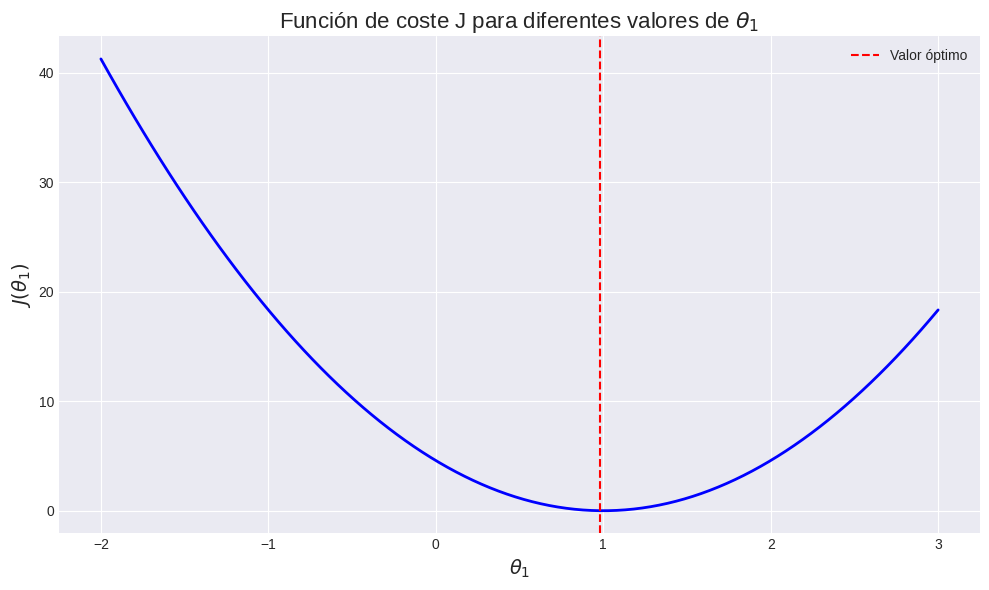

In [44]:

X = df['x_1'].values
y = df['y'].values
m = len(y)

theta_1_vals = np.linspace(-2, 3, 100)
J_vals = []

theta_0 = 0

for t1 in theta_1_vals:
    y_pred = theta_0 + t1 * X
    J = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    J_vals.append(J)


J_vals = np.array(J_vals)

plt.figure(figsize=(10, 6))
plt.plot(theta_1_vals, J_vals, 'b-', linewidth=2)
plt.xlabel(r'$\theta_1$', fontsize=14)
plt.ylabel(r'$J(\theta_1)$', fontsize=14)
plt.title('Función de coste J para diferentes valores de $\\theta_1$', fontsize=16)
plt.grid(True)
plt.axvline(theta_1_vals[np.argmin(J_vals)], color='r', linestyle='--', label='Valor óptimo')
plt.legend()
plt.tight_layout()
plt.show()


In [45]:
theta_1_min = theta_1_vals[np.argmin(J_vals)]
print(f"El valor óptimo de theta_1 que minimiza J es: {theta_1_min:.4f}")


El valor óptimo de theta_1 que minimiza J es: 0.9798


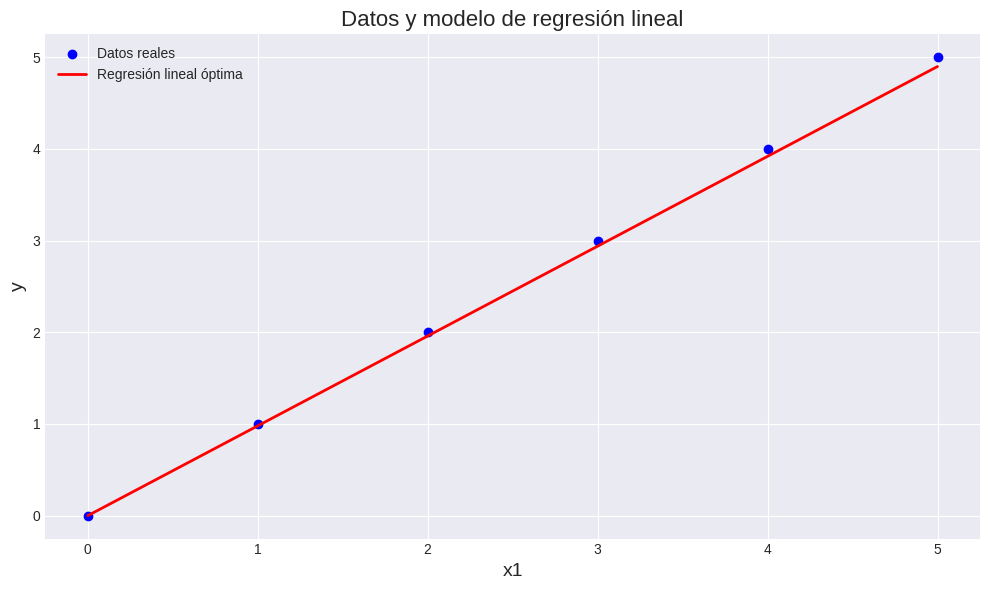

In [46]:
y_pred_opt = theta_0 + theta_1_min * X

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred_opt, color='red', label='Regresión lineal óptima', linewidth=2)
plt.xlabel('x1', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Datos y modelo de regresión lineal', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

4. Encontrar la función de coste para diferentes valores de $\theta_0$, $\theta_1$.
Para ello puede emplear los metodos `surface` y `contour` dentro de la libreria de `matplotlib`.  Construya primero, con los valores de $\theta_0$, $\theta_1 $ definidos un `np.meshgrid` y evalue  para cada punto $\theta_0$, $\theta_1$ la función de coste.

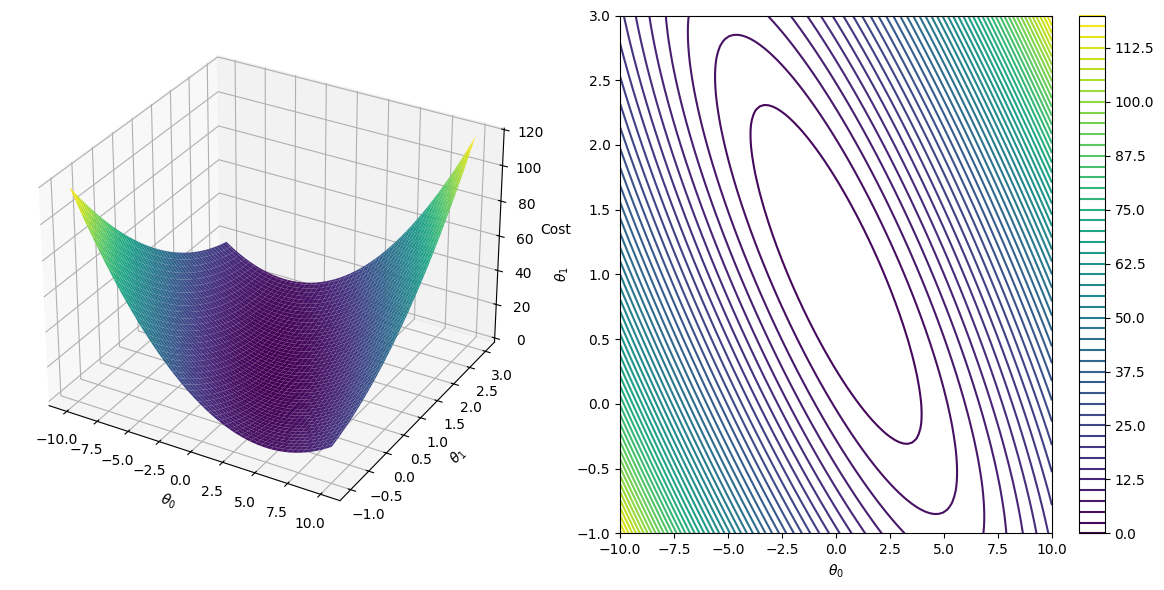

In [21]:
theta_0_vals = np.linspace(-10, 10, 100)
theta_1_vals = np.linspace(-1, 3, 100)
T0, T1 = np.meshgrid(theta_0_vals, theta_1_vals)

J_vals = np.zeros_like(T0)

for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        J_vals[i, j] = fc(T0[i, j], T1[i, j], X, y)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(T0, T1, J_vals, cmap='viridis')
ax.set_xlabel(r"$\theta_0$")
ax.set_ylabel(r"$\theta_1$")
ax.set_zlabel("Cost")

ax2 = fig.add_subplot(122)
contour = ax2.contour(T0, T1, J_vals, levels=50, cmap='viridis')
ax2.set_xlabel(r"$\theta_0$")
ax2.set_ylabel(r"$\theta_1$")
fig.colorbar(contour)
plt.tight_layout()
plt.show()

5. Encontrar la expresión teórica para la función de coste en el caso 1D y 2D.

Empezamos con forma simbólica para dejar claras las ecuaciones pedidas. Luego una visualización numérica.

In [26]:
theta0, theta1 = sp.symbols('theta0 theta1')
x, y = sp.symbols('x y')
m = sp.Symbol('m', positive=True, integer=True)
x_i = sp.IndexedBase('x_i')
y_i = sp.IndexedBase('y_i')
i = sp.Symbol('i', integer=True)

y_hat_i = theta0 + theta1 * x_i[i]
J_1D = (1 / (2 * m)) * sp.summation((y_hat_i - y_i[i])**2, (i, 0, m - 1))
J_1D

Sum((theta0 + theta1*x_i[i] - y_i[i])**2, (i, 0, m - 1))/(2*m)

In [27]:
theta0, theta1, theta2 = sp.symbols('theta0 theta1 theta2')
x1_i = sp.IndexedBase('x1_i')
x2_i = sp.IndexedBase('x2_i')
y_i = sp.IndexedBase('y_i')

y_hat_i = theta0 + theta1 * x1_i[i] + theta2 * x2_i[i]
J_2D = (1 / (2 * m)) * sp.summation((y_hat_i - y_i[i])**2, (i, 0, m - 1))
J_2D

Sum((theta0 + theta1*x1_i[i] + theta2*x2_i[i] - y_i[i])**2, (i, 0, m - 1))/(2*m)

6. Construya un algoritmo en el que emplee el gradiente descente para determinar el minimo de una función, determine el mínimo con una error epsilon de  1E-4, pruebe su algoritmo para $f(x)= (x-4)^2$ y al menos 3 valores de $\alpha$

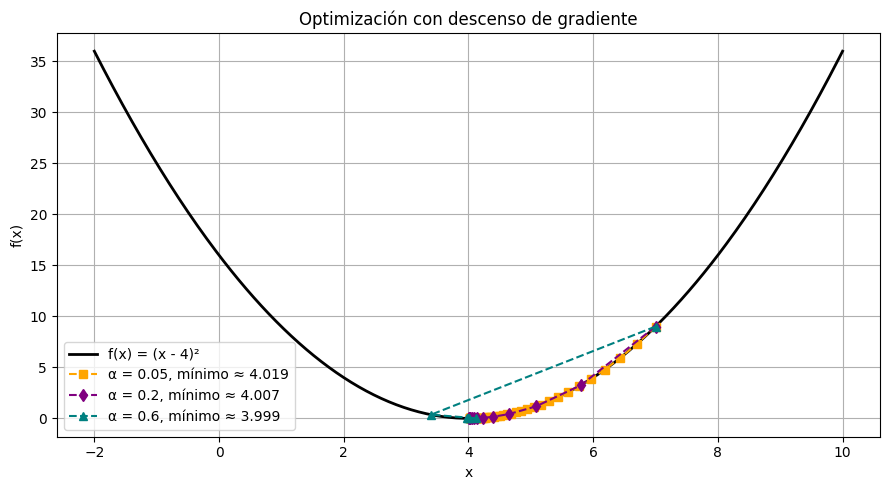

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x - 4)**2

def df(x):
    return 2 * (x - 4)

def gradde(f, df, x0, alfa, epsilon=1e-4, max_iter=1000):
    x = x0
    trayectoria = [x]
    for _ in range(max_iter):
        x_sig = x - alfa * df(x)
        trayectoria.append(x_sig)
        if abs(f(x_sig) - f(x)) < epsilon:
            break
        x = x_sig
    return x_sig, f(x_sig), trayectoria

xs = np.linspace(-2, 10, 400)
ys = f(xs)

x_inicial = 7
tasas = [0.05, 0.2, 0.6]
colores = ['orange', 'purple', 'teal']
marcas = ['s', 'd', '^']

plt.figure(figsize=(9, 5))
plt.plot(xs, ys, color='black', linewidth=2, label='f(x) = (x - 4)²')

for alfa, color, marker in zip(tasas, colores, marcas):
    minimo, valor, puntos = gradde(f, df, x_inicial, alfa)
    fx_puntos = [f(x) for x in puntos]
    plt.plot(puntos, fx_puntos, marker=marker, color=color, linestyle='--',
             label=f'α = {alfa}, mínimo ≈ {minimo:.3f}')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Optimización con descenso de gradiente')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


7. Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente https://en.wikipedia.org/wiki/Gradient_descent:

  -  Para ello realice una gráfica de la función en 3D, y un mapa de contorno de la función.
  - Determine el valor mínimo de la función con el metodo del gradiente descendente.

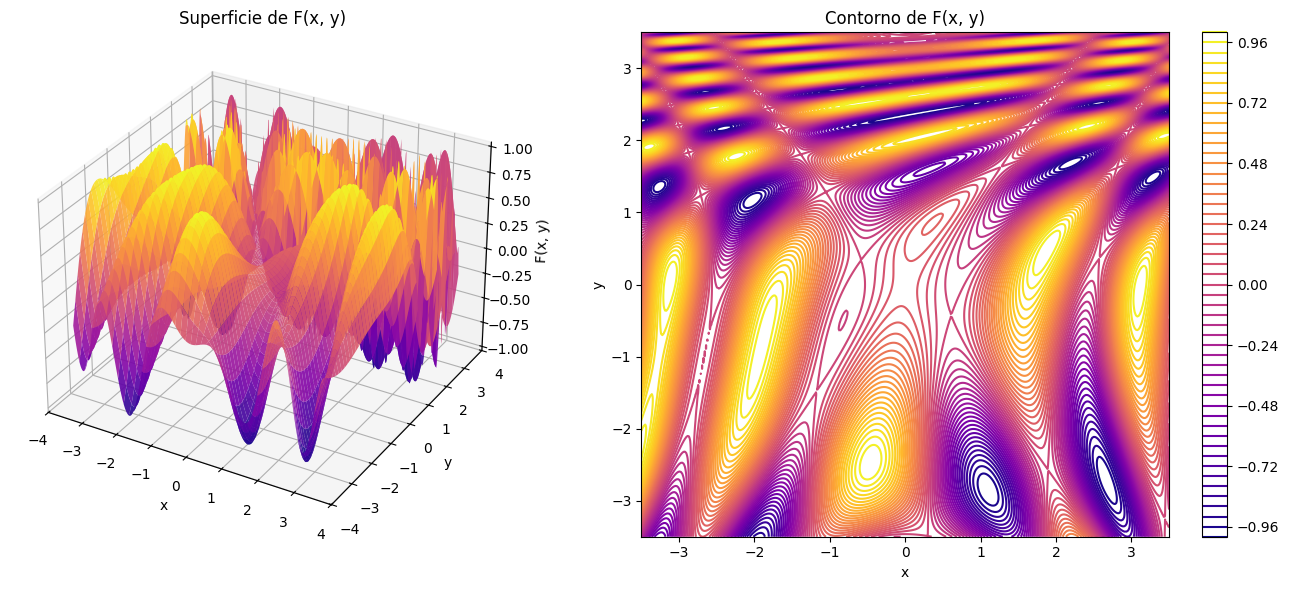

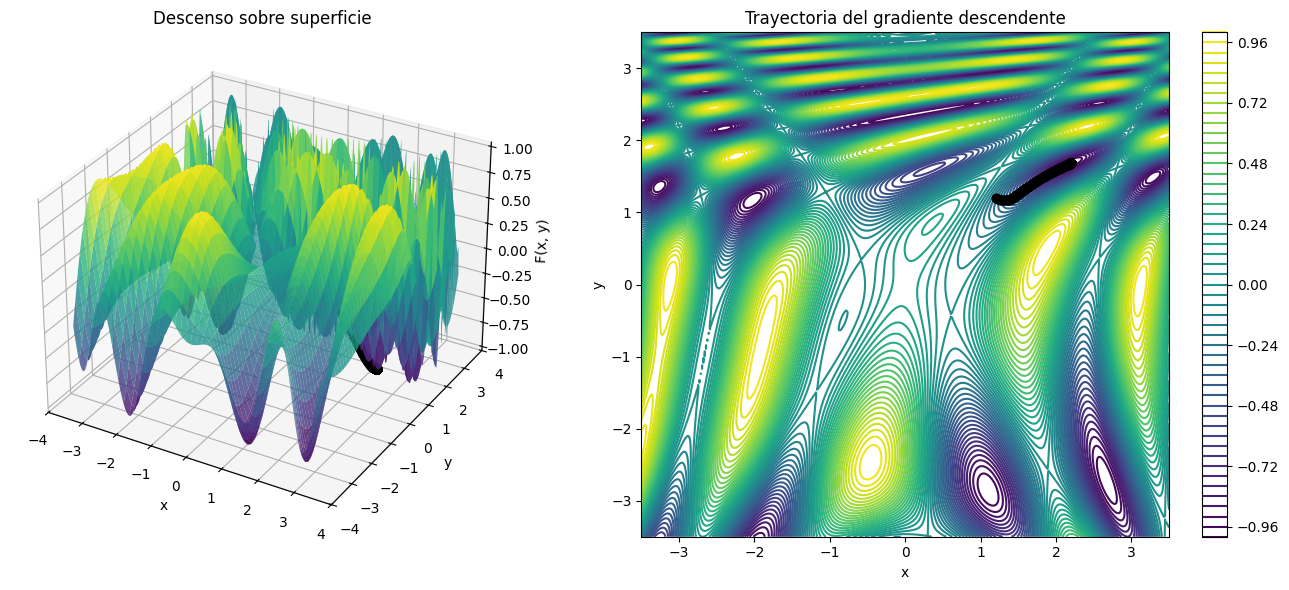

Coordenadas del mínimo encontrado: x = 2.201756, y = 1.687046
Valor mínimo de la función: F(x, y) = -1.000000


In [31]:
def F(x, y):
    t1 = 0.5 * x**2
    t2 = 0.25 * y**2
    expr1 = t1 - t2 + 3
    expr2 = 2 * x + 1 - np.exp(y)
    return np.sin(expr1) * np.cos(expr2)

def dFx(x, y):
    t1 = 0.5 * x**2
    t2 = 0.25 * y**2
    expr1 = t1 - t2 + 3
    expr2 = 2 * x + 1 - np.exp(y)
    d_expr1_dx = x
    d_expr2_dx = 2
    term1 = np.cos(expr1) * d_expr1_dx * np.cos(expr2)
    term2 = -np.sin(expr1) * d_expr2_dx * np.sin(expr2)
    return term1 + term2

def dFy(x, y):
    t1 = 0.5 * x**2
    t2 = 0.25 * y**2
    expr1 = t1 - t2 + 3
    expr2 = 2 * x + 1 - np.exp(y)
    d_expr1_dy = -0.5 * y
    d_expr2_dy = -np.exp(y)
    term1 = np.cos(expr1) * d_expr1_dy * np.cos(expr2)
    term2 = -np.sin(expr1) * d_expr2_dy * np.sin(expr2)
    return term1 + term2

def gradiente_descendente_2d(func, dfdx, dfdy, x0, y0, alpha, epsilon=1e-6, max_iter=20000):
    x_actual = x0
    y_actual = y0
    trayectoria = [(x_actual, y_actual)]
    for _ in range(max_iter):
        grad_x = dfdx(x_actual, y_actual)
        grad_y = dfdy(x_actual, y_actual)
        x_siguiente = x_actual - alpha * grad_x
        y_siguiente = y_actual - alpha * grad_y
        trayectoria.append((x_siguiente, y_siguiente))
        cambio = np.sqrt((x_siguiente - x_actual)**2 + (y_siguiente - y_actual)**2)
        if cambio < epsilon:
            break
        x_actual = x_siguiente
        y_actual = y_siguiente
    valor_final = func(x_actual, y_actual)
    return x_actual, y_actual, valor_final, trayectoria

x_vals = np.linspace(-3.5, 3.5, 400)
y_vals = np.linspace(-3.5, 3.5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = F(X, Y)

figura = plt.figure(figsize=(14, 6))
grafico3d = figura.add_subplot(1, 2, 1, projection='3d')
grafico3d.plot_surface(X, Y, Z, cmap='plasma', edgecolor='none', alpha=0.9)
grafico3d.set_xlabel('x')
grafico3d.set_ylabel('y')
grafico3d.set_zlabel('F(x, y)')
grafico3d.set_title('Superficie de F(x, y)')

contorno = figura.add_subplot(1, 2, 2)
niveles = contorno.contour(X, Y, Z, levels=60, cmap='plasma')
contorno.set_xlabel('x')
contorno.set_ylabel('y')
contorno.set_title('Contorno de F(x, y)')
figura.colorbar(niveles)
plt.tight_layout()
plt.show()

x_inicial = 1.2
y_inicial = 1.2
tasa_aprendizaje = 0.01

x_min, y_min, valor_min, camino = gradiente_descendente_2d(F, dFx, dFy, x_inicial, y_inicial, tasa_aprendizaje)

camino = np.array(camino)
X_trayectoria = camino[:, 0]
Y_trayectoria = camino[:, 1]
Z_trayectoria = F(X_trayectoria, Y_trayectoria)

figura_2 = plt.figure(figsize=(14, 6))
grafico_camino = figura_2.add_subplot(1, 2, 1, projection='3d')
grafico_camino.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)
grafico_camino.plot(X_trayectoria, Y_trayectoria, Z_trayectoria, color='black', marker='o', linewidth=2)
grafico_camino.set_title('Descenso sobre superficie')
grafico_camino.set_xlabel('x')
grafico_camino.set_ylabel('y')
grafico_camino.set_zlabel('F(x, y)')

contorno_2 = figura_2.add_subplot(1, 2, 2)
niveles_2 = contorno_2.contour(X, Y, Z, levels=60, cmap='viridis')
contorno_2.plot(X_trayectoria, Y_trayectoria, color='black', marker='o', linestyle='-')
contorno_2.set_xlabel('x')
contorno_2.set_ylabel('y')
contorno_2.set_title('Trayectoria del gradiente descendente')
figura_2.colorbar(niveles_2)
plt.tight_layout()
plt.show()

print(f"Coordenadas del mínimo encontrado: x = {x_min:.6f}, y = {y_min:.6f}")
print(f"Valor mínimo de la función: F(x, y) = {valor_min:.6f}")

8. Empleando los siguientes datos :

```
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
```

y las herramientas desarrolladas en los apartados anteriores,
construya un algorítmo que permita determinar una regresión lineal.

/tmp/ipython-input-809088776.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


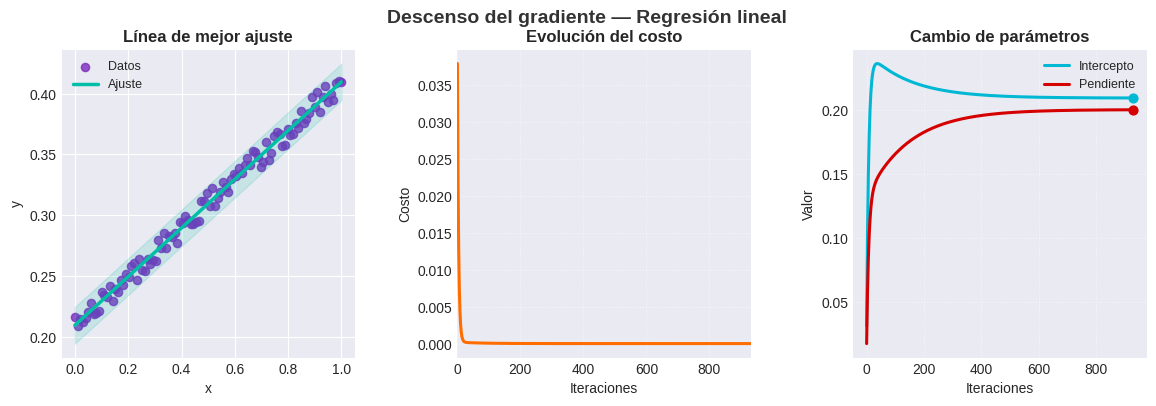

Intercepto final: 0.20949
Pendiente final: 0.20027
Costo final: 0.0000166


In [36]:
from matplotlib import cm

plt.style.use('seaborn-v0_8-darkgrid')

x = np.linspace(0, 1, 100)
y = 0.2 + 0.2 * x + 0.02 * np.random.random(100)
n = len(y)

X = np.vstack((np.ones(n), x))
a = np.zeros(2)
tasa = 0.1
tol = 1e-6
pasos = 10000

def modelo(a, X):
    return a @ X

def costo(a, X, y):
    p = modelo(a, X)
    return (1/(2*n)) * np.sum((p - y)**2)

def grad(a, X, y):
    p = modelo(a, X)
    return (1/n) * ((p - y) @ X.T)

costos = []
hist = []

for _ in range(pasos):
    g = grad(a, X, y)
    nuevo = a - tasa * g
    c = costo(nuevo, X, y)
    costos.append(c)
    hist.append(nuevo.copy())
    if np.linalg.norm(nuevo - a) < tol:
        a = nuevo
        break
    a = nuevo

hist = np.array(hist)

fig = plt.figure(figsize=(14, 4))
gs = fig.add_gridspec(1, 3, wspace=0.35)
ax = gs.subplots(sharex=False, sharey=False)

ax[0].scatter(x, y, c='#7B2CBF', alpha=0.8, s=35, label='Datos')
ax[0].plot(x, modelo(a, X), c='#00BFA6', lw=2.5, label='Ajuste')
ax[0].fill_between(x, modelo(a, X)-0.015, modelo(a, X)+0.015, color='#00BFA6', alpha=0.15)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Línea de mejor ajuste', fontsize=12, weight='bold')
ax[0].legend(fontsize=9)

ax[1].plot(costos, color='#FF6D00', lw=2.2)
ax[1].set_xlabel('Iteraciones')
ax[1].set_ylabel('Costo')
ax[1].set_title('Evolución del costo', fontsize=12, weight='bold')
ax[1].grid(True, linestyle=':', alpha=0.6)
ax[1].set_xlim(0, len(costos))

ax[2].plot(hist[:, 0], color='#00B8D4', lw=2.2, label='Intercepto')
ax[2].plot(hist[:, 1], color='#D50000', lw=2.2, label='Pendiente')
ax[2].scatter(len(hist)-1, a[0], c='#00B8D4', s=40)
ax[2].scatter(len(hist)-1, a[1], c='#D50000', s=40)
ax[2].set_xlabel('Iteraciones')
ax[2].set_ylabel('Valor')
ax[2].set_title('Cambio de parámetros', fontsize=12, weight='bold')
ax[2].legend(fontsize=9)
ax[2].grid(True, linestyle=':', alpha=0.6)

plt.suptitle('Descenso del gradiente — Regresión lineal', fontsize=14, weight='bold', color='#333')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print(f"Intercepto final: {a[0]:.5f}")
print(f"Pendiente final: {a[1]:.5f}")
print(f"Costo final: {costos[-1]:.7f}")


9. Compare su resultado empleando la libreria linearRegresion() de sklearn.

In [35]:
from sklearn.linear_model import LinearRegression

X_resh = X.reshape(-1, 1)
modelo = LinearRegression().fit(X_resh, y)
t0_skl = modelo.intercept_
t1_skl = modelo.coef_[0]
y_pred_skl = modelo.predict(X_resh)
costo_skl = (1/(2*m)) * np.sum((y_pred_skl - y)**2)

print(f"Parámetros sklearn: t0 = {t0_skl:.5f}, t1 = {t1_skl:.5f}")
print(f"Costo sklearn: {costo_skl:.7f}")

Parámetros sklearn: t0 = 0.20961, t1 = 0.19995
Costo sklearn: 0.0000165
